In [67]:
from dataclasses import dataclass
import networkx as nx # pip install networkx
import matplotlib.pyplot as plt # pip install matplotlib
from math import lcm
from players.player_helper_code import generateMemoryMap, build_graph_from_memory, MazeGraph, Square

In [68]:
test = [[(0,0),(0,1), (0,2), (0,3), (0,4)],
        
        [(1,0),(1,1), (1,2), (1,3), (1,4)],

        [(2,0),(2,1), (2,2), (2,3), (2,4)],

        [(3,0),(3,1), (3,2), (3,3), (3,4)],
        
        [(4,0),(4,1), (4,2), (4,3), (4,4)]]

In [69]:
i = 0
j = 0

j-1 == -1

leftNeighbor = (i, j-1)

rightNeighbor = (i, j+1)

In [70]:
mem_map = generateMemoryMap(dim=5)

graph = build_graph_from_memory(mem_map)
graph.graph[(0,0)]

{(0, 1): [3, 4], (1, 0): [0, 2]}

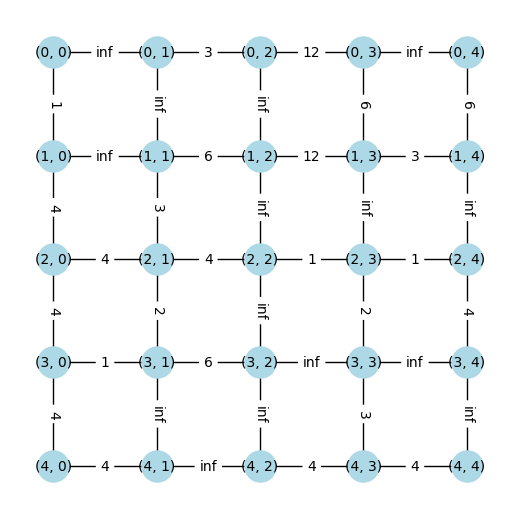

In [63]:
# mem_map = generateMemoryMap(dim=5)
# graph = build_graph_from_memory(mem_map)
graph.visualize_graph_in_grid(figsize=5)

In [64]:
import heapq

def findShortestPathsToEachNode(graph: MazeGraph, startNode: tuple, turnNumber: int):
    dimension = graph.getMazeDimension()

    # Initialize the minDistanceArray with infinity
    minDistanceArray = [[float('inf')] * dimension for _ in range(dimension)]
    minDistanceArray[startNode[0]][startNode[1]] = 0  # Start node has distance 0

    # Initialize the parent dictionary to track the shortest path and the turn when we moved to this node
    # parent[(x, y)] = (parentNode, turnWeMovedToNode)
    parent = {startNode: (None, turnNumber)}  # Initially at startNode at the given turnNumber

    # Min-heap stores (distance, (x, y) node)
    minHeap = [(0, startNode)]  # Start node with distance 0

    visitedNodes = set()

    # Process the heap until it is empty
    while minHeap:
        turnsToCurrentNode, currentNode = heapq.heappop(minHeap)
        currentXCoord, currentYCoord = currentNode

        # Skip node if already visited
        if currentNode in visitedNodes:
            continue

        visitedNodes.add(currentNode)

        # Get neighbors of the current node from the graph
        neighbors: dict[tuple, int] = graph.getNeighbors(currentNode)
        # {(0, 1): [3, 4],
        # 
        #  (1, 0): [3, 1]}

        for (xCoordNeighbour, yCoordNeighbour), (node1Freq, node2Freq) in neighbors.items():
            # Combined Frequency of the doors
            if node1Freq == 0 or node2Freq == 0:
                combinedFrequencey = float('inf')
            else:
                # LCM is the combined frequency of the doors
                combinedFrequencey = lcm(node1Freq, node2Freq)
    
            # Determine the turn number when we reach this node
            turnWeWillBeAtThisNode = turnNumber + turnsToCurrentNode

            # Calculate the number of turns we need to wait for the door to open
            turnsToWait = (combinedFrequencey - (turnWeWillBeAtThisNode % combinedFrequencey)) % combinedFrequencey
            # at the node at turn 19. 19 % 12 = 7... 12 -7 = 5  % combinedFrequencey = 5

            newTurnsToGetToNeighbor = turnsToCurrentNode + turnsToWait + 1

            # Update the neighbor's distance if a shorter path is found
            if newTurnsToGetToNeighbor < minDistanceArray[xCoordNeighbour][yCoordNeighbour]:
                minDistanceArray[xCoordNeighbour][yCoordNeighbour] = newTurnsToGetToNeighbor
                # Store both the parent node and the turn at which we moved to this neighbor
                parent[(xCoordNeighbour, yCoordNeighbour)] = (currentNode, turnWeWillBeAtThisNode + turnsToWait + 1)
                heapq.heappush(minHeap, (newTurnsToGetToNeighbor, (xCoordNeighbour, yCoordNeighbour)))

    return minDistanceArray, parent  # Return both distances and paths


In [65]:
# mem_map = generateMemoryMap(dim=5)
# graph = build_graph_from_memory(mem_map)
minDistanceArray, parent = findShortestPathsToEachNode(graph, (0, 0), turnNumber=1)
minDistanceArray

[[0, 39, 36, 30, 30],
 [1, 9, 12, 24, 27],
 [4, 8, 12, 13, 14],
 [8, 9, 12, 14, 16],
 [12, 16, 16, 15, 16]]

(0, 1)


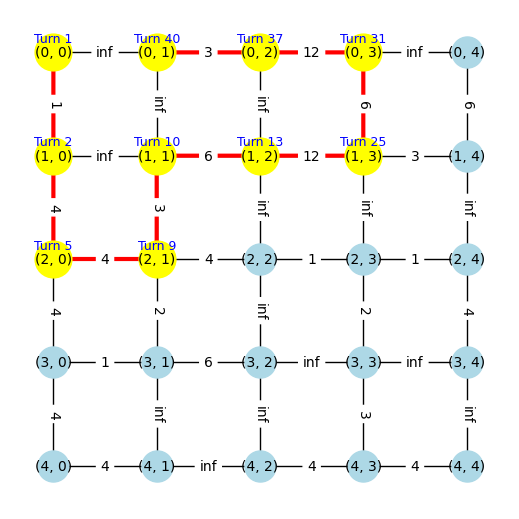

In [66]:
startNode = (0, 0)
targetNode = (0,1)
graph.visualize_graph_in_grid(minDistanceArray, parent, startNode=startNode, targetNode=targetNode, figsize=5)

In [9]:
minDistanceArray

[[0, 2, 4, 12, 24, 36, 42, 36, 40, 42],
 [8, 4, 8, 10, 18, 38, 36, 28, 30, inf],
 [8, 6, 12, 12, 16, 20, 24, 26, 33, 34],
 [12, 8, 12, 14, 15, 28, 28, 27, 32, 34],
 [18, 21, 13, inf, 24, 26, 28, 28, 30, 36],
 [20, 22, 15, 20, 21, 24, 30, 30, 45, 40],
 [24, 21, 16, 18, 21, 22, 60, 48, 44, 42],
 [24, 20, 18, 24, 26, 28, 48, 46, 48, 45],
 [25, 24, 21, 27, 27, 28, 36, 44, 48, 48],
 [inf, inf, inf, 30, 30, 42, 40, 42, 52, 49]]

(9, 6)


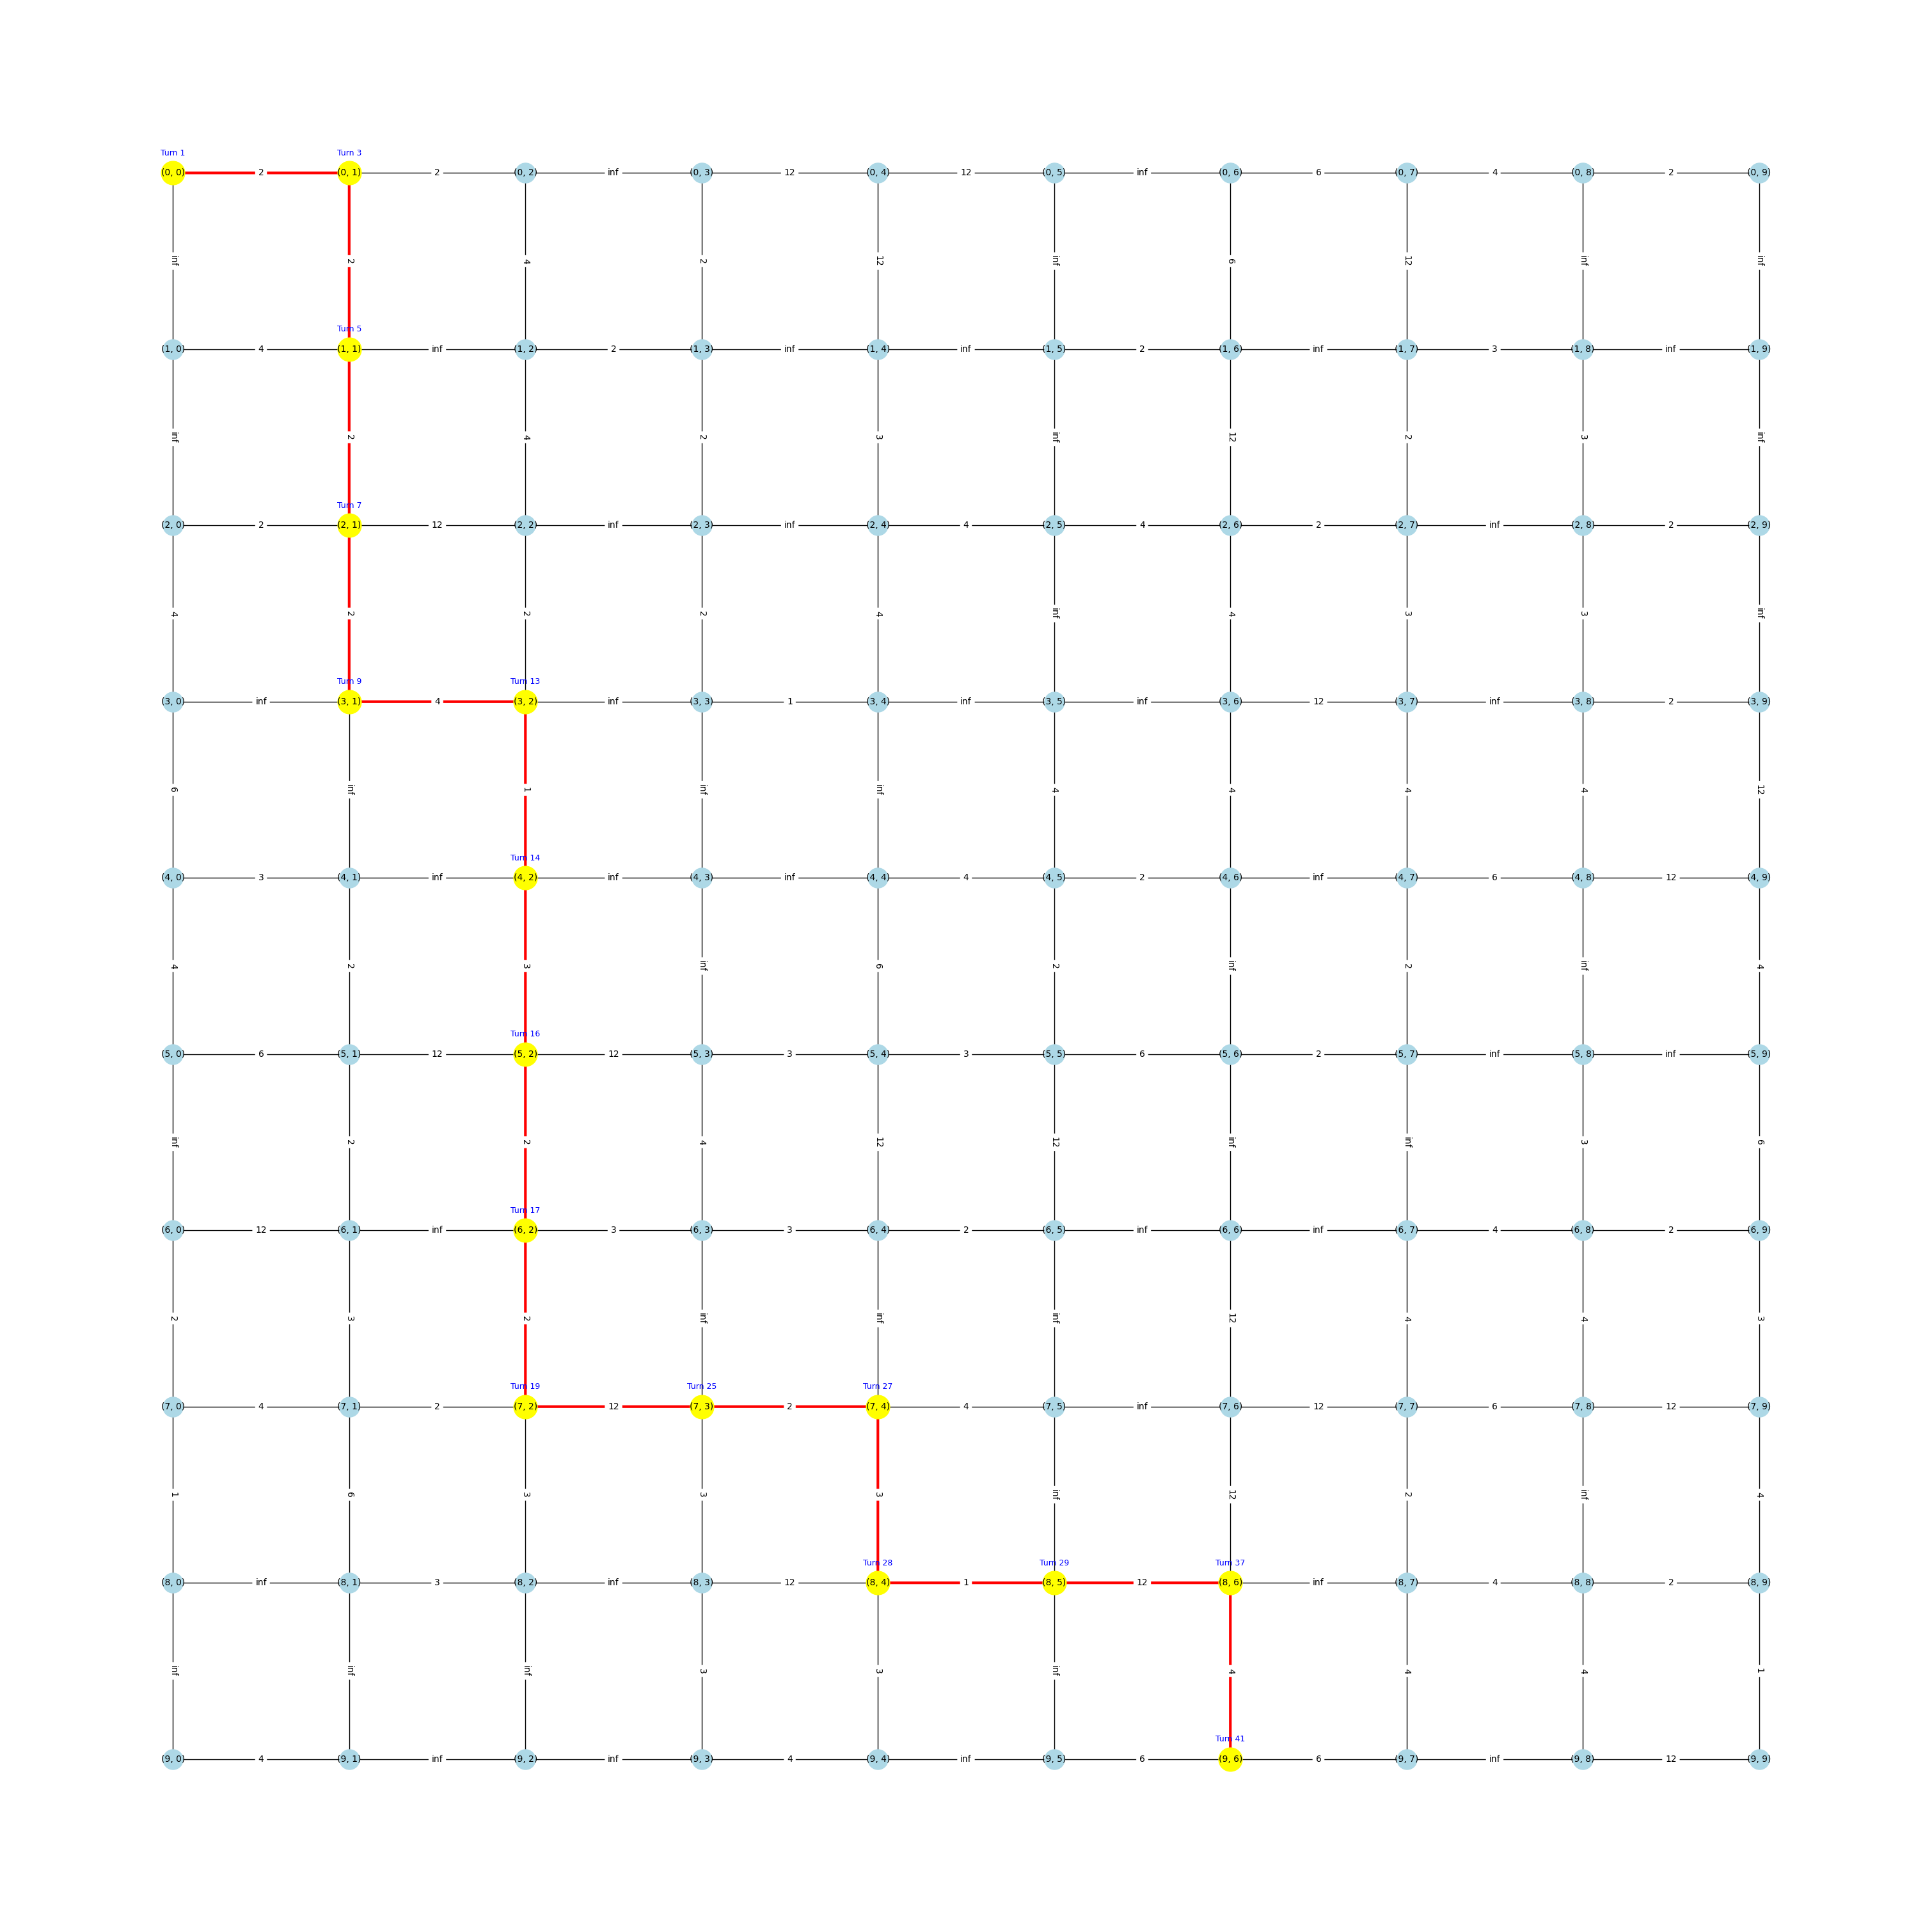

In [10]:
startNode = (0, 0)
targetNode = (9,6)
graph.visualize_graph_in_grid(minDistanceArray, parent, startNode=startNode, targetNode=targetNode)

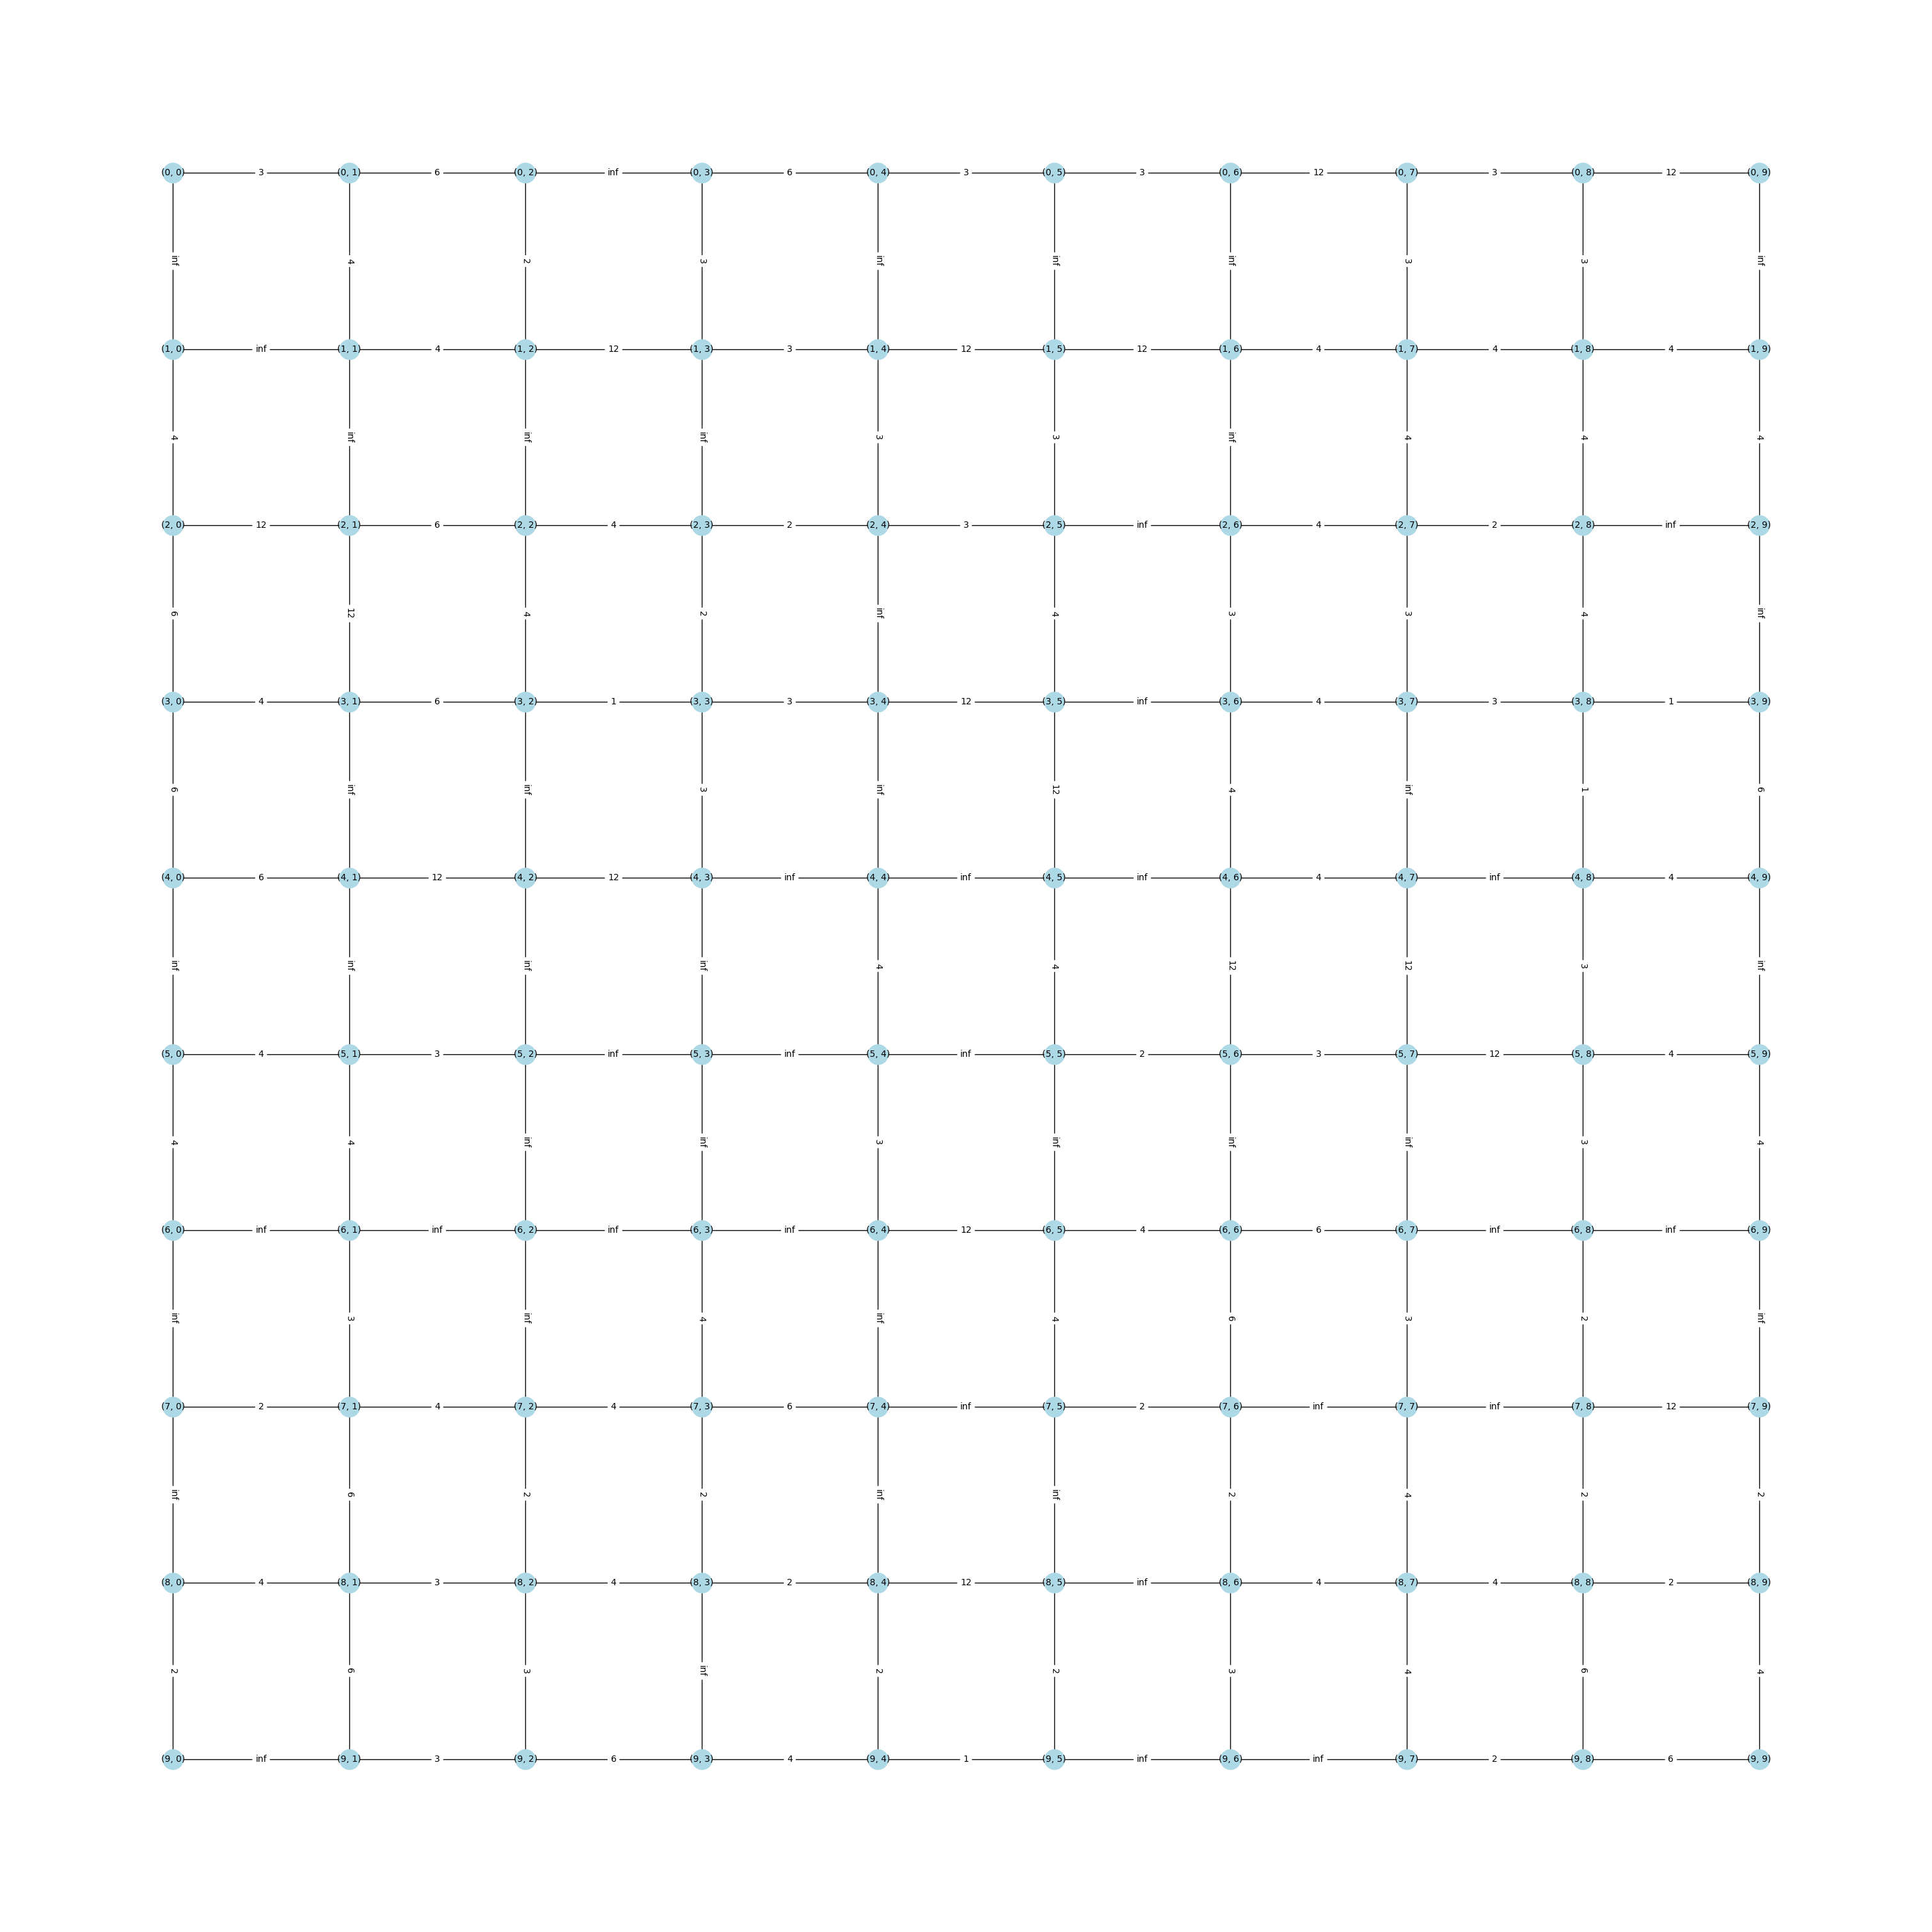

In [20]:
graph.visualize_graph_in_grid()